In [26]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

import analysis
import razor_data
import toy_data
import plotting
import gp
importlib.reload(analysis);
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

In [2]:
def run_variational_gp(box, btags, num_mr_bins, mr_max,
                      k_ell=200, k_alpha=200, 
                      steps=1000, lr=0.001,
                      train_Z=True,
                      verbose=False):
    kernel = gp.SquaredExponentialKernel(k_ell, k_alpha, fixed=True)
    data = analysis.get_data(box, btags, num_mr_bins, mr_max)
    U = data['u']
    Y = data['y']
    G = gp.VariationalPoissonGP(kernel, U, Y, train_Z=train_Z)
    G.fit(num_steps=steps, lr=lr, verbose=verbose)
    return G

In [18]:
box = 'SevenJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 700
k_alpha = 300
steps = 400
lr = 0.0001
train_Z = False
verbose = True

G = run_variational_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      train_Z=train_Z, verbose=verbose)

Iteration 0: -ELBO = 11732.530
Iteration 100: -ELBO = -1792.844
Iteration 200: -ELBO = -1797.070
Iteration 300: -ELBO = -1801.353


In [19]:
data = analysis.get_data(box, btags, num_mr_bins, mr_max)
samples = np.asarray(
    [G.sample(float(x), num_samples=40000) for x in data['u']]).T
samples = np.exp(samples)

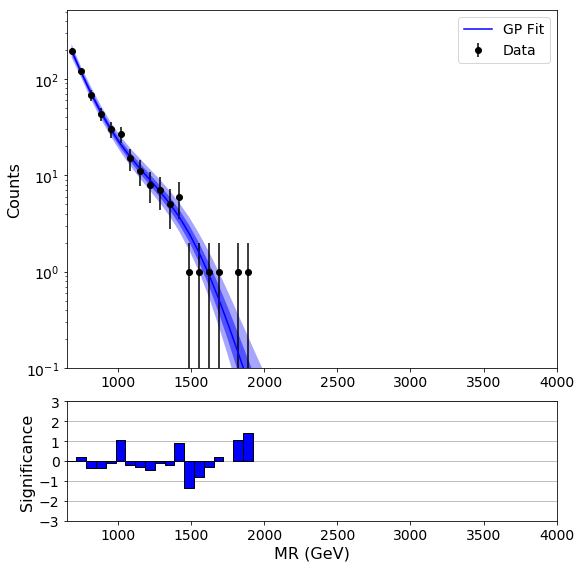

In [20]:
plotting.plot_hist_1d(U=G.U.data, Y=G.Y.data, samples=samples)

In [5]:
def run_variational_gp_trainZ(box, btags, num_mr_bins, mr_max,
                      k_ell=200, k_alpha=200, 
                      steps=1000, lr=0.01,
                      verbose=False, Z=None):
    kernel = gp.SquaredExponentialKernel(k_ell, k_alpha, fixed=True)
    data = analysis.get_data(box, btags, num_mr_bins, mr_max)
    U = data['u']
    Y = data['y']
    G = gp.VariationalPoissonGP(kernel, U, Y, train_Z=True, Z=Z)
    G.fit_adam(num_steps=steps, lr=lr, verbose=verbose)
    return G

In [6]:
# Optimize the inducing point positions (Z)
box = 'SevenJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 700
k_alpha = 300
steps = 10000
lr = 0.01
verbose = True

data = analysis.get_data(box, btags, num_mr_bins, mr_max)
Z = None

G = run_variational_gp_trainZ(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose, Z=Z)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = 10821.097
Iteration 100: -ELBO = -1791.206
Iteration 200: -ELBO = -1793.244
Iteration 300: -ELBO = -1796.272
Iteration 400: -ELBO = -1797.273
Iteration 500: -ELBO = -1798.773
Iteration 600: -ELBO = -1799.076
Iteration 700: -ELBO = -1796.207
Iteration 800: -ELBO = -1799.718
Iteration 900: -ELBO = -1799.510
Iteration 1000: -ELBO = -1801.685
Iteration 1100: -ELBO = -1797.596
Iteration 1200: -ELBO = -1802.565
Iteration 1300: -ELBO = -1803.603
Iteration 1400: -ELBO = -1800.322
Iteration 1500: -ELBO = -1802.854
Iteration 1600: -ELBO = -1803.293
Iteration 1700: -ELBO = -1802.691
Iteration 1800: -ELBO = -1804.358
Iteration 1900: -ELBO = -1804.440
Iteration 2000: -ELBO = -1803.787
Iteration 2100: -ELBO = -1804.111
Iteration 2200: -ELBO = -1802.814
Iteration 2300: -ELBO = -1805.064
Iteration 2400: -ELBO = -1805.443
Iteration 2500: -ELBO = -1804.884
Iteration 2600: -ELBO = -1803.838
Iteration 2700: -ELBO = -1803.445
Iteration 2800: -ELBO = -1805.211
Iteration 2900: -ELBO = -1

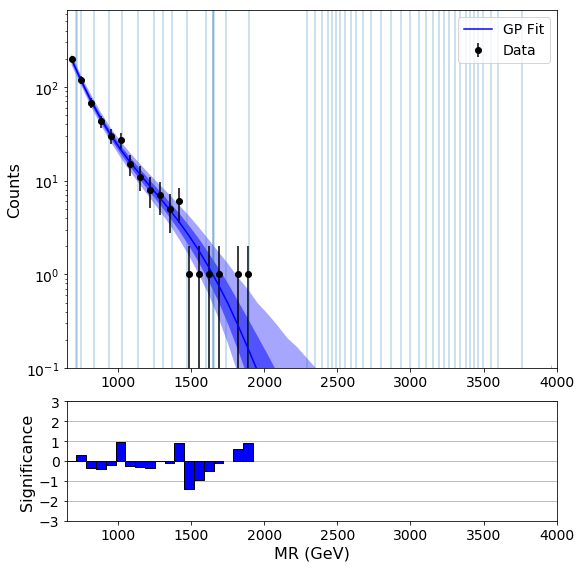

In [11]:
data = analysis.get_data(box, btags, num_mr_bins, mr_max)
samples = np.asarray(
    [G.sample(float(x), num_samples=40000) for x in data['u']]).T
samples = np.exp(samples)
plotting.plot_hist_1d(U=G.U.data, Y=G.Y.data, samples=samples,
                     Z=G.get_Z().data) 

In [14]:
box = 'MultiJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 400
k_alpha = 200
steps = 1000
lr = 0.01
verbose = True

data = analysis.get_data(box, btags, num_mr_bins, mr_max)
Z = None

G = run_variational_gp_trainZ(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose, Z=Z)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = 19361.816
Iteration 100: -ELBO = -11476.028
Iteration 200: -ELBO = -11485.628
Iteration 300: -ELBO = -11494.367
Iteration 400: -ELBO = -11500.267
Iteration 500: -ELBO = -11499.525
Iteration 600: -ELBO = -11505.464
Iteration 700: -ELBO = -11504.648
Iteration 800: -ELBO = -11507.370
Iteration 900: -ELBO = -11509.476


In [27]:
def plot_G(G, box, btags, num_mr_bins, mr_max, ymin=0.1):
    data = analysis.get_data(box, btags, num_mr_bins, mr_max)
    samples = np.exp(np.asarray(
            [G.sample(
                float(x), num_samples=40000) for x in data['u']]).T)
    plotting.plot_hist_1d(U=G.U.data, Y=G.Y.data, samples=samples,
                     Z=G.get_Z().data, ymin=ymin) 

In [17]:
G.fit_adam(num_steps=1000, lr=lr, verbose=verbose)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = -11510.288
Iteration 100: -ELBO = -11513.399
Iteration 200: -ELBO = -11516.243
Iteration 300: -ELBO = -11516.703
Iteration 400: -ELBO = -11518.196
Iteration 500: -ELBO = -11517.291
Iteration 600: -ELBO = -11518.567
Iteration 700: -ELBO = -11518.905
Iteration 800: -ELBO = -11519.632
Iteration 900: -ELBO = -11518.445


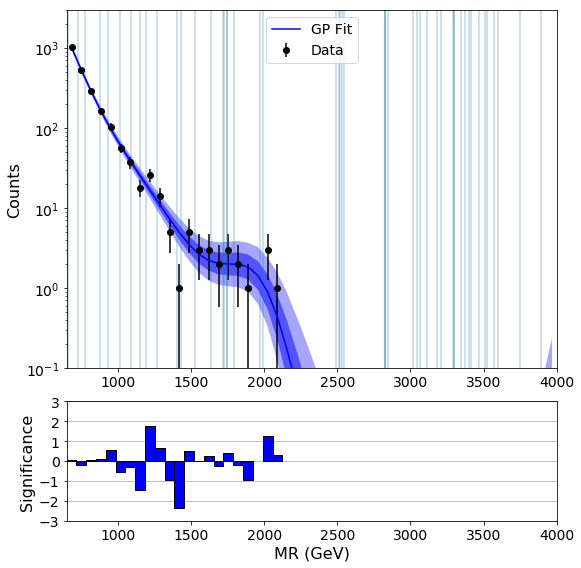

In [18]:
plot_G(G, box, btags, num_mr_bins, mr_max)

In [29]:
box = 'DiJet'
btags = 1
num_mr_bins = 50
mr_max = 2000
k_ell = 400
k_alpha = 200
steps = 1000
lr = 0.01
verbose = True

data = analysis.get_data(box, btags, num_mr_bins, mr_max)
Z = None

G = run_variational_gp_trainZ(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose, Z=Z)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = 53663.555
Iteration 100: -ELBO = -2221.262
Iteration 200: -ELBO = -2228.176
Iteration 300: -ELBO = -2239.541
Iteration 400: -ELBO = -2245.469
Iteration 500: -ELBO = -2247.974
Iteration 600: -ELBO = -2250.043
Iteration 700: -ELBO = -2251.363
Iteration 800: -ELBO = -2253.351
Iteration 900: -ELBO = -2254.020


In [30]:
G.fit_adam(num_steps=1000, lr=lr, verbose=verbose)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = -2254.297
Iteration 100: -ELBO = -2257.816
Iteration 200: -ELBO = -2262.484
Iteration 300: -ELBO = -2264.582
Iteration 400: -ELBO = -2257.173
Iteration 500: -ELBO = -2264.399
Iteration 600: -ELBO = -2262.333
Iteration 700: -ELBO = -2264.663
Iteration 800: -ELBO = -2264.021
Iteration 900: -ELBO = -2262.165


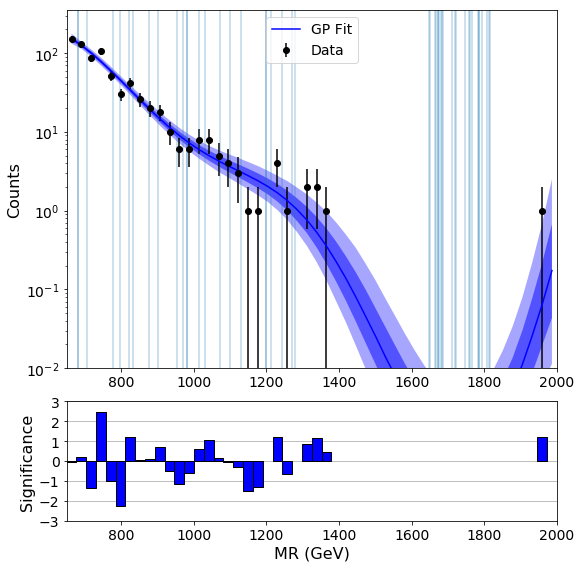

In [33]:
plot_G(G, box, btags, num_mr_bins, mr_max, ymin=0.01)

In [24]:
box = 'MultiJet'
btags = 1
num_mr_bins = 50
mr_max = 1800
k_ell = 400
k_alpha = 150
steps = 3000
lr = 0.01
verbose = True
Z = None

G = run_variational_gp_trainZ(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose, Z=Z)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = 2559.207
Iteration 100: -ELBO = -17003.043
Iteration 200: -ELBO = -17009.834
Iteration 300: -ELBO = -17013.287
Iteration 400: -ELBO = -17013.324
Iteration 500: -ELBO = -17017.482
Iteration 600: -ELBO = -17018.838
Iteration 700: -ELBO = -17019.703
Iteration 800: -ELBO = -17021.164
Iteration 900: -ELBO = -17021.902
Iteration 1000: -ELBO = -17022.875
Iteration 1100: -ELBO = -17023.020
Iteration 1200: -ELBO = -17023.600
Iteration 1300: -ELBO = -17023.287
Iteration 1400: -ELBO = -17023.990
Iteration 1500: -ELBO = -17022.982
Iteration 1600: -ELBO = -17024.098
Iteration 1700: -ELBO = -17014.916
Iteration 1800: -ELBO = -17023.477
Iteration 1900: -ELBO = -17023.967
Iteration 2000: -ELBO = -17023.822
Iteration 2100: -ELBO = -17024.521
Iteration 2200: -ELBO = -17024.355
Iteration 2300: -ELBO = -17024.568
Iteration 2400: -ELBO = -17023.318
Iteration 2500: -ELBO = -17024.371
Iteration 2600: -ELBO = -17024.592
Iteration 2700: -ELBO = -17023.418
Iteration 2800: -ELBO = -17024.803

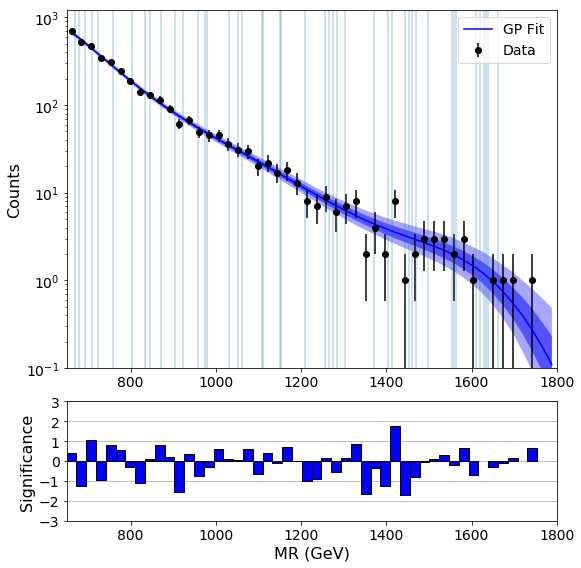

In [25]:
plot_G(G, box, btags, num_mr_bins, mr_max)

In [34]:
box = 'LeptonMultiJet'
btags = 3
num_mr_bins = 50
mr_max = 1800
k_ell = 400
k_alpha = 150
steps = 3000
lr = 0.01
verbose = True
Z = None

G = run_variational_gp_trainZ(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose, Z=Z)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = 104145.500
Iteration 100: -ELBO = 143.071
Iteration 200: -ELBO = 100.298
Iteration 300: -ELBO = 90.264
Iteration 400: -ELBO = 77.016
Iteration 500: -ELBO = 77.097
Iteration 600: -ELBO = 74.278
Iteration 700: -ELBO = 73.445
Iteration 800: -ELBO = 75.810
Iteration 900: -ELBO = 66.021
Iteration 1000: -ELBO = 68.587
Iteration 1100: -ELBO = 63.015
Iteration 1200: -ELBO = 67.302
Iteration 1300: -ELBO = 66.446
Iteration 1400: -ELBO = 60.946
Iteration 1500: -ELBO = 60.426
Iteration 1600: -ELBO = 65.750
Iteration 1700: -ELBO = 63.413
Iteration 1800: -ELBO = 60.396
Iteration 1900: -ELBO = 60.182
Iteration 2000: -ELBO = 58.962
Iteration 2100: -ELBO = 55.562
Iteration 2200: -ELBO = 56.444
Iteration 2300: -ELBO = 54.544
Iteration 2400: -ELBO = 58.323
Iteration 2500: -ELBO = 58.069
Iteration 2600: -ELBO = 55.125
Iteration 2700: -ELBO = 53.512
Iteration 2800: -ELBO = 53.571
Iteration 2900: -ELBO = 52.403


In [37]:
G.fit_adam(num_steps=1000, lr=lr, verbose=verbose)

/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:69: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py:70: UserWarning: tensor1 is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


Iteration 0: -ELBO = 23.354
Iteration 100: -ELBO = 23.807
Iteration 200: -ELBO = 22.142
Iteration 300: -ELBO = 22.185
Iteration 400: -ELBO = 21.376
Iteration 500: -ELBO = 24.265
Iteration 600: -ELBO = 20.355
Iteration 700: -ELBO = 19.791
Iteration 800: -ELBO = 19.945
Iteration 900: -ELBO = 18.751


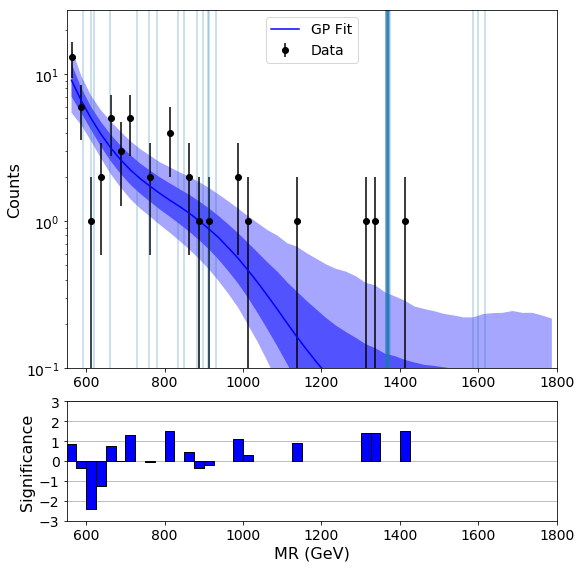

In [38]:
plot_G(G, box, btags, num_mr_bins, mr_max)